__INTRODUCTION__

The English Premier League is played every year(season) from the months of August to May. 20 clubs participate in this season and compete against each other throughout the year in a league format. 3 points are awarded for every win, 1 point for a draw and no points when a team loses a match. This project will look at the data that surrounds each match that was played during the 2018-2019 season and compare the performances of different clubs in the premiership. This analysis is intended to serve all the fans around the globe, to help them analyze their team's performances and see how their respective clubs fared. 

__BACKGROUND__

I am an avid follower of football(European football) and a big supporter of Arsenal Football Club. It is my dream to one day work as a Data Scientist for Arsenal in London, which has motivated me to take up this research project. This kind of analysis happens after every match in the English Premier League, where pundits comment on the performances of players and clubs across England. I want my work to exhibit the similar quality and help fans understand the beautiful game through number, i.e quantitative analysis.

__RESEARCH QUESTIONS__

The specific research questions that I want to ask are as follows:
1. Do clubs recover from a scoreline that is heading to a draw/ one team is losing and go on to win games? How does this defer in home games/away games? Is it easier to win such games in front of the home fans?

2. How do clubs fare in the festive season (December - January) than when they fare throughout the rest of the season? There are a lot of matches in the festive season and clubs faulter during this time.

3. Which clubs have garnered the most points in the 'top 6' against each other?

4. Do clubs that finish lower in the table generate more number of yellow and red cards than the clubs that finish in the top half of the table?

5. Are there any bottom half clubs that are considered as the 'bogey' team for top clubs?

6. Before derby matches, does the form of a club matter and influence the derby games?

7. Do clubs that start well in the season, end up finishing as the winners or in the top 4? Similarly, those who start worse off in the league, do they finish in the bottom half or do they claw their way back?

__METHODS__

I plan to use the basic strategy of creating dictionaries per season and per club. I plan to use the pandas, numpy, matplotlib and seaborn libraries of python. Some questions would require plotting of charts using the matplotlib and seaborn libraries, where as some questions can be answered by displaying tables using the pandas dataframe and display them within Jupyter notebook. I would be generating the entire league table by calculating the points won by each club and ordering them in descending order of points won. This will help in giving an overview of what 'top' clubs are and what 'bottom' clubs are.

__FINDINGS__

The findings are mentioned in the jupyter notebook as well, along with tables and graphs

1. The top clubs definitely show a trend of recovering from being atleast a goal down/ drawing at Half time and then coming back to win the game. The games played in front of home fans always show a higher percentage of comeback wins for all teams.
2. As we can see, what a difference there is in terms of the points tally between the top sides in the festive period. Man City went onto win the league, but had a very poor festive period. This is generally due to injuries to players during this time, when the players have to a lot of games in a short span of time. The squad depth is also tested during this period. Man City won the league and finished 1st, but finished 4th during the festive period.
3. We can clearly see from the tables shown in the notebook, that some clubs have fared well against the fellow top 6 clubs. This gives us an important conclusion that some clubs like Tottenham, Man United need to improve their performances against the top sides, whereas clubs like Arsenal and Chelsea need to up their game against the lower table teams.
4. We clearly saw that the clubs that finished in the bottom tend to have a higher number of cards (more fouls committed) when compared to the top clubs. The top 3 clubs Man City, Liverpool and Chelsea finished at the bottom in this table.
5. Wolves, even though towards the end not a bottom club, was clearly a nuisance to the other top 6 clubs as shown in the table below.
6. Derby matches are those that are played between the clubs that belong to the same city. We saw that, the preceeding form of a club goes for a toss when playing a derby due to the emotions that are involved in derby games.
7. As shown in the graphs below, there's no specific trend that we see except for the top 2 clubs, Liverpool and Man City. These 2 start well and end well, whereas clubs like Brighton, Wolves show a very erratic trend in their league positions.

__DISCUSSIONS__

__Limitations__:
One of the limitations I found with this dataset is that I do not have information as to who scored the first goal and when the goals were scored. That limited my analysis of the comeback mentality question and I had to be content with scores as half time and full time. Another limitation according to me, which was pointed to me during my presentation as well, is a lack of visualization charts. This is partly down to the type of analysis that I was doing. If there would have been the time when the goals were scored, I could have probably plotted a time series chart.

__Implications__:
We can see that this analysis could be used by fans to argue against each other and engage in healthy arguments, but could also lead to unnecessary brawls. One aspect that I found could be used from this analysis is the fact that I am showing how clubs have performed. This could be used to show some particular club in bad light, even though that might have already been done in the season by TV pundits.

__HUMAN CENTERED CONSIDERATIONS__

In this dataset, I am to bring about a change in which statistics and numbers are viewed in football. At times, only numbers are not enough to understand how a club is playing. There are other aspects to the game, like the mentality of the players, their eating habits, stadium atmospheres and fan following that affect the result of a match. I want my analysis to show that we need to go beyond quantitative research when analysing how well a football club is doing. This could potentially be used by clubs to introspect and fans to see how their club is performing over seasons. I do not feel there is any bias in the data as these are purely match facts.

__ETHICAL CONSIDERATIONS__

The dataset contains the names of the referees who officiate in football matches. However, they do not contain any information about these referees. Hence, I do not think this violates any ethical rules. However, I had planned to conduct research on a question that revolved around analysing the impact of referees on match results. The result, which would contain the names of the referees, may have resulted in a situation that may have created an issue for the referees, which I have now avoided.

__CONCLUSION__

In general, we see that the top 6 clubs have maintained a steady pace right from the start of the season and more or less, we do not see a big change in their standings. The lower league teams show a lot of fluctuation in their standings throughout the season, which is down to poor quality of football in my opinion. We also see that some clubs perform well against the top 6 clubs, whereas some perform better against the bottom clubs. We also saw a general trend that as quality of football increases, the number of cards earned/fouls committed decreases. One major aspect we saw in this study is the percentage of comeback wins observed for the top6 clubs at their home stadiums was drastically higher( at time > 50% ) than their comebacks in the away matches. This highlights the importance of home fans.

In [7]:
import pandas as pd
import csv
import matplotlib
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

__CREATING AN EXAMPLE OF THE LEAGUE TABLE__

1. This part of the code helps understand people who do not follow football, how a league table looks like. 
2. I have used a simple dictionary, to store the key:value pairs with keys being the club names and the values being a list of values like points, games played, wins, losses, etc.
3. I iterate through the dataframe to form this dictionary.

In [15]:
#Reading the csv file into a pandas dataframe
df = pd.read_csv('season-1819_csv.csv')

league_table = defaultdict(int)

for index, row in df.iterrows():
    
    #Storing the names of home team, away team, goals scored and the full time result.
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    fthg = row['FTHG']
    ftag = row['FTAG']
    ftr = row['FTR']
    
    #This checks if there exists an entry in the dictionary already with the club name as the key
    if league_table[home_team]:
        
        points_home = league_table[home_team]
        
        #indexes 5 and 6 store the goals for and goals against for a particular club
        points_home[5] = points_home[5] + fthg
        points_home[6] = points_home[6] + ftag
        
        points_away = league_table[away_team]
        points_away[5] = points_away[5] + ftag
        points_away[6] = points_away[6] + fthg
        
        if ftr == 'H':
            
            #indexes 1 stores the points gained, 2 stores the number of wins and 3 stores the number of losses
            points_home[1] = points_home[1] + 3
            points_home[2] = points_home[2] + 1
            points_away[3] = points_away[3] + 1
            
        elif ftr == 'A':
            points_away[1] = points_away[1] + 3
            points_away[2] = points_away[2] + 1
            points_home[3] = points_home[3] + 1
        else:
            
            
            points_home[1] = points_home[1] + 1
            points_home[4] = points_home[4] + 1
            points_away[1] = points_away[1] + 1
            points_away[4] = points_away[4] + 1
        
        #The 0th index refers to number of games played. We add one everytime we come across the same club name
        points_home[0]+=1
        points_away[0]+=1
        
        #Creating a new value for the same dictionary
        league_table[home_team] = points_home
        league_table[away_team] = points_away
    else:
        
        if ftr == 'H':
            #We append the following list to the away and home teams if we do not have an entry in the dictionary.
            league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
            league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
        elif ftr == 'A':
            league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
            league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]
            
        else:
            league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
            league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
            
#We initialise a list to convert the dictionary items to a dataframe
main_list = []

#We iterate through the dictionary that we created
for key, value in league_table.items():
    temp_list = []
    temp_list.append(key)
    for i in value:
        temp_list.append(i)
    main_list.append(temp_list)

#We then create a dataframe and display the league table, sorted by total points column.
df = pd.DataFrame(main_list, columns=['Team','MP','Points','W','L','D','GF','GA'])
df = df[['Team','MP','W','D','L','GF','GA','Points']]
df = df.sort_values(by='Points', ascending=False)
df = df.reset_index(drop=True)
final_table = df.copy()
df

,Team,MP,W,D,L,GF,GA,Points
0,Man City,38,32,2,4,95,23,98
1,Liverpool,38,30,7,1,89,22,97
2,Chelsea,38,21,9,8,63,39,72
3,Tottenham,38,23,2,13,67,39,71
4,Arsenal,38,21,7,10,73,51,70
5,Man United,38,19,9,10,65,54,66
6,Wolves,38,16,9,13,47,46,56
7,Everton,38,15,9,14,54,46,53
8,Leicester,38,15,7,16,51,48,52
9,West Ham,38,15,7,16,52,55,52


The above league table shows how many points each club gained and who finished as winners. The bottom 3 clubs get relegated to the championship in England. The columns are as follows:
1. Team: Name of the clubs
2. MP: Matches PLayed
3. W: Wins
4. D: Draws
5. L: Losses
6. Goals For
7. Goals Against
8. Points: Points

*__Q1__*

__ComeBack Mentality__

I wanted to see how the top clubs reacted to going down in a match or even drawing at Half Time, to come back and win the game. We consider the top 6 clubs and assess their performances when they were down by atleast 1 goal or were level with their opponents at half time. We want to see how this performance varies in front of their home fans against the away fans

I keep a track of all the failed attempts and the successfull attempts of all the clubs, then take a simple percentage of how many comebacks the clubs were able to make.
1. We iterate through the dataframe so that we can filter on the clubs of choice.
2. We maintain 4 variables that keep a track of the failed and successful comeback attempts by a club.
3. We then iterate through the dataframe we read the csv file into, to calculate this statistic for all the clubs of interest.
4. We use a simple (numberof successful comebacks/number of failed comebacks+ number of successful comebacks) as the metric.

In [13]:
df = pd.read_csv('season-1819_csv.csv')

comeback_table = defaultdict(int)

#initialize variable that keep a count of the failed and successful comebacks by clubs
home_comebacks = 0
away_comebacks = 0
home_failed = 0
away_failed = 0

#Iterate through the different clubs in the dataframe df
for index, row in df.iterrows():
    if row['HomeTeam'] == 'Man United' or row['AwayTeam'] == 'Man United':
        if row['HomeTeam'] == 'Man United':
            #We add one to a home comeback if the home team comes back to win 
            if row['FTR'] == 'H' and row['HTR'] != 'H':
                home_comebacks+=1
            elif row['FTR'] != 'H' and row['HTR'] !='H':
                home_failed+=1
        else:
            if row['FTR'] == 'A' and row['HTR'] != 'A':
                away_comebacks+=1
            elif row['FTR'] != 'A' and row['HTR'] != 'A':
                away_failed+=1
print('Manchester United have come from a goal down/draw to win at home',home_comebacks/(home_failed+home_comebacks)*100,'% of times')
print('Manchester United have come from a goal down/draw to win away',away_comebacks/(away_comebacks+away_failed)*100,'% of times\n')

df = pd.read_csv('season-1819_csv.csv')

comeback_table = defaultdict(int)

home_comebacks = 0
away_comebacks = 0
home_failed = 0
away_failed = 0

for index, row in df.iterrows():
    if row['HomeTeam'] == 'Man City' or row['AwayTeam'] == 'Man City':
        if row['HomeTeam'] == 'Man City':
            if row['FTR'] == 'H' and row['HTR'] != 'H':
                home_comebacks+=1
            elif row['FTR'] != 'H' and row['HTR'] !='H':
                home_failed+=1
        else:
            if row['FTR'] == 'A' and row['HTR'] != 'A':
                away_comebacks+=1
            elif row['FTR'] != 'A' and row['HTR'] != 'A':
                away_failed+=1
print('Manchester City have come from a goal down/draw to win at home',home_comebacks/(home_failed+home_comebacks)*100,'% of times')
print('Manchester City have come from a goal down/draw to win away',away_comebacks/(away_comebacks+away_failed)*100,'% of times\n')

df = pd.read_csv('season-1819_csv.csv')

comeback_table = defaultdict(int)

home_comebacks = 0
away_comebacks = 0
home_failed = 0
away_failed = 0

for index, row in df.iterrows():
    if row['HomeTeam'] == 'Liverpool' or row['AwayTeam'] == 'Liverpool':
        if row['HomeTeam'] == 'Liverpool':
            if row['FTR'] == 'H' and row['HTR'] != 'H':
                home_comebacks+=1
            elif row['FTR'] != 'H' and row['HTR'] !='H':
                home_failed+=1
        else:
            if row['FTR'] == 'A' and row['HTR'] != 'A':
                away_comebacks+=1
            elif row['FTR'] != 'A' and row['HTR'] != 'A':
                away_failed+=1
                
print('Liverpool have come from a goal down/draw to win at home',home_comebacks/(home_failed+home_comebacks)*100,'% of times')
print('Liverpool have come from a goal down/draw to win away',away_comebacks/(away_comebacks+away_failed)*100,'% of times\n')

df = pd.read_csv('season-1819_csv.csv')

comeback_table = defaultdict(int)

home_comebacks = 0
away_comebacks = 0
home_failed = 0
away_failed = 0

for index, row in df.iterrows():
    if row['HomeTeam'] == 'Chelsea' or row['AwayTeam'] == 'Chelsea':
        if row['HomeTeam'] == 'Chelsea':
            if row['FTR'] == 'H' and row['HTR'] != 'H':
                home_comebacks+=1
            elif row['FTR'] != 'H' and row['HTR'] !='H':
                home_failed+=1
        else:
            if row['FTR'] == 'A' and row['HTR'] != 'A':
                away_comebacks+=1

            elif row['FTR'] != 'A' and row['HTR'] != 'A':
                away_failed+=1
print('Arsenal have come from a goal down/draw to win at home',home_comebacks/(home_failed+home_comebacks)*100,'% of times')
print('Arsenal have come from a goal down/draw to win away',away_comebacks/(away_comebacks+away_failed)*100,'% of times\n')

df = pd.read_csv('season-1819_csv.csv')

comeback_table = defaultdict(int)

home_comebacks = 0
away_comebacks = 0
home_failed = 0
away_failed = 0

for index, row in df.iterrows():
    if row['HomeTeam'] == 'Tottenham' or row['AwayTeam'] == 'Tottenham':
        if row['HomeTeam'] == 'Tottenham':
            if row['FTR'] == 'H' and row['HTR'] != 'H':
                home_comebacks+=1
            elif row['FTR'] != 'H' and row['HTR'] !='H':
                home_failed+=1
        else:
            if row['FTR'] == 'A' and row['HTR'] != 'A':
                away_comebacks+=1
            elif row['FTR'] != 'A' and row['HTR'] != 'A':
                away_failed+=1
print('Tottenham have come from a goal down/draw to win at home',home_comebacks/(home_failed+home_comebacks)*100,'% of times')
print('Tottenham have come from a goal down/draw to win away',away_comebacks/(away_failed+away_comebacks)*100,'% of times')

Manchester United have come from a goal down/draw to win at home 20.0 % of times
Manchester United have come from a goal down/draw to win away 18.181818181818183 % of times

Manchester City have come from a goal down/draw to win at home 83.33333333333334 % of times
Manchester City have come from a goal down/draw to win away 42.857142857142854 % of times

Liverpool have come from a goal down/draw to win at home 66.66666666666666 % of times
Liverpool have come from a goal down/draw to win away 45.45454545454545 % of times

Arsenal have come from a goal down/draw to win at home 50.0 % of times
Arsenal have come from a goal down/draw to win away 30.76923076923077 % of times

Tottenham have come from a goal down/draw to win at home 50.0 % of times
Tottenham have come from a goal down/draw to win away 33.33333333333333 % of times


__*Q2*__

__Festive Season__

Here, we try to analyse a big problem in the English Premier League. The winter period during the months of December and January is an extremely gruelling and tiring period for the players, where we often see injuried being picked up by the players. This affects the performances of clubs.

1. I first use a date filter on the dataframe to take only those matches that occur in the months of December and January.
2. Next, I consider only the top6 clubs to do my analysis, by initialising a list with their names in it.
3. I then follow the same steps used above, to iterate through the dataframe and see how the performances of the clubs vary in the festive season.
4. Since all my analysis is through dictionaries, I always check if a key exists( key being the club name) and then add the details of the club.
5. Each key in the dictionary is the name of the club, and the value is a list of values that represents the columns mentioned above in the table.

In [22]:
df = pd.read_csv('season-1819_csv.csv')

#We take the Date column from the csv in a variable
dates = df.Date
new_dates = []

#We are converting all the dates in a format that we can use to filter on
for date in dates:
    new_dates.append(datetime.strptime(date,'%d/%m/%Y'))

#We create a new column "dates" in the dataframe
df['dates'] = new_dates

#We filter on dates that fall in December and January
df = df[(df['dates'] >= datetime.strptime('01/12/2018', '%d/%m/%Y')) & (df['dates'] <= datetime.strptime('01/02/2019', '%d/%m/%Y'))]

league_table = defaultdict(int)

top6_clubs = ['Man United','Arsenal','Tottenham','Chelsea','Liverpool','Man City']

for index, row in df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    if home_team in top6_clubs or away_team in top6_clubs:
#         print(home_team, away_team)
        fthg = row['FTHG']
        ftag = row['FTAG']
        ftr = row['FTR']
        
        #Check if both the clubs are present in the dictionary
        if league_table[home_team] and league_table[away_team]:
            points_home = league_table[home_team]
            points_home[5] = points_home[5] + fthg
            points_home[6] = points_home[6] + ftag

            points_away = league_table[away_team]
            points_away[5] = points_away[5] + ftag
            points_away[6] = points_away[6] + fthg
            
            #Checks who won the game
            if ftr == 'H':
                points_home[1] = points_home[1] + 3
                points_home[2] = points_home[2] + 1
                points_away[3] = points_away[3] + 1

            elif ftr == 'A':
                points_away[1] = points_away[1] + 3
                points_away[2] = points_away[2] + 1
                points_home[3] = points_home[3] + 1
            else:
                points_home[1] = points_home[1] + 1
                points_home[4] = points_home[4] + 1
                points_away[1] = points_away[1] + 1
                points_away[4] = points_away[4] + 1
            
            #Adds one to the number of games played for both the home team and the away team
            points_home[0]+=1
            points_away[0]+=1
            
            #Updates the league table
            league_table[home_team] = points_home
            league_table[away_team] = points_away
        else:
            
            if ftr == 'H':
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[1] = points_home[1] + 3
                    points_home[2] = points_home[2] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                    
                    #If the away team does not have a key in the dictionary, we initialise a list and add that team as the key
                    league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
                    
                elif league_table[away_team]:
                    
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[3] = points_away[3] + 1
                    points_away[0]+=1
                    
                    league_table[away_team] = points_away
                    
                    #If the home team does not have a key in the dictionary, we initialise a list and add that team as the key
                    league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                    league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
                    
            
            elif ftr == 'A':
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[3] = points_home[3] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                    league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]
                    
                elif league_table[away_team]:
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[1] = points_away[1] + 3
                    points_away[2] = points_away[2] + 1
                    points_away[0]+=1
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                    league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]
                    
            else:
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[1] = points_home[1] + 1
                    points_home[4] = points_home[4] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                    
                    #
                    league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
                elif league_table[away_team]:
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[1] = points_away[1] + 1
                    points_away[4] = points_away[4] + 1
                    points_away[0]+=1           
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                    league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
#         print(home_team, away_team, fthg, ftag, league_table)
#         input()

main_list = []

#We iterate through the dictionary to form our dataframe
for key, value in league_table.items():
    temp_list = []
    temp_list.append(key)
    for i in value:
        temp_list.append(i)
    main_list.append(temp_list)

df = pd.DataFrame(main_list, columns=['Team','MP','Points','W','L','D','GF','GA'])
df = df[['Team','MP','W','D','L','GF','GA','Points']]
df = df.sort_values(by='Points', ascending=False)
df = df.reset_index(drop=True)

print("The table during the festive period")
df.head(6)


The table during the festive period


,Team,MP,W,D,L,GF,GA,Points
0,Liverpool,11,9,1,1,29,9,28
1,Tottenham,11,8,0,3,27,13,24
2,Man United,11,7,3,1,28,14,23
3,Man City,11,7,0,4,23,14,21
4,Arsenal,11,6,2,3,22,17,20
5,Chelsea,11,6,1,4,12,12,19


As we can see, what a difference there is in terms of the points tally between the top sides in the festive period. Man City went onto win the league, but had a very poor festive period. This is generally due to injuries to players during this time, when the players have to a lot of games in a short span of time. The squad depth is also tested during this period. Man City won the league and finished 1st, but finished 4th during the festive period.

__*Q3*__

__HOW TOP CLUBS FARED AGAINST EACH OTHER__

Now, we want to know how the clubs that finished as the top 6, fared against each. How did they actually play against one and another, which gives us an indication of how they played against the lower ranked sides.
The logic of forming the league table remains the same as the previous calculation, however only the top 6 clubs are filtered on.

Here, we again iterate through the main dataframe and filter on the top 6 clubs to show results only for these clubs. We create a league table through a dictionary, that is later on used to form a dataframe.

In [24]:
df = pd.read_csv('season-1819_csv.csv')

#Initialising the dictionary
league_table = defaultdict(int)

#We define a list that contains the names of the top 6 clubs
top6_clubs = ['Man United','Arsenal','Tottenham','Chelsea','Liverpool','Man City']

for index, row in df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    
    #We filter only those records that contain any one of the top 6 clubs above.
    if home_team in top6_clubs and away_team in top6_clubs:
        fthg = row['FTHG']
        ftag = row['FTAG']
        ftr = row['FTR']
        if league_table[home_team] and league_table[away_team]:
            points_home = league_table[home_team]
            points_home[5] = points_home[5] + fthg
            points_home[6] = points_home[6] + ftag

            points_away = league_table[away_team]
            points_away[5] = points_away[5] + ftag
            points_away[6] = points_away[6] + fthg

            if ftr == 'H':
                points_home[1] = points_home[1] + 3
                points_home[2] = points_home[2] + 1
                points_away[3] = points_away[3] + 1

            elif ftr == 'A':
                points_away[1] = points_away[1] + 3
                points_away[2] = points_away[2] + 1
                points_home[3] = points_home[3] + 1
            else:
                points_home[1] = points_home[1] + 1
                points_home[4] = points_home[4] + 1
                points_away[1] = points_away[1] + 1
                points_away[4] = points_away[4] + 1

            points_home[0]+=1
            points_away[0]+=1

            league_table[home_team] = points_home
            league_table[away_team] = points_away
        else:
            
            if ftr == 'H':
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[1] = points_home[1] + 3
                    points_home[2] = points_home[2] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                    league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
                    
                elif league_table[away_team]:
                    
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[3] = points_away[3] + 1
                    points_away[0]+=1
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                    league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
                    
            
            elif ftr == 'A':
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[3] = points_home[3] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                    league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]
                    
                elif league_table[away_team]:
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[1] = points_away[1] + 3
                    points_away[2] = points_away[2] + 1
                    points_away[0]+=1
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                    league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]
                    
            else:
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[1] = points_home[1] + 1
                    points_home[4] = points_home[4] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                
                    league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
                elif league_table[away_team]:
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[1] = points_away[1] + 1
                    points_away[4] = points_away[4] + 1
                    points_away[0]+=1           
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                    league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
#         print(home_team, away_team, fthg, ftag, league_table)
#         input()
main_list = []
for key, value in league_table.items():
    temp_list = []
    temp_list.append(key)
    for i in value:
        temp_list.append(i)
    main_list.append(temp_list)

#We form a dataframe from the list we created above with columns named in the function below
df = pd.DataFrame(main_list, columns=['Team','MP','Points','W','L','D','GF','GA'])
#We rearrange the columns in the way they are reported in actual premier league standings.
df = df[['Team','MP','W','D','L','GF','GA','Points']]

#We sort this dataframe by the Points columns
df = df.sort_values(by='Points', ascending=False)
df = df.reset_index(drop=True)
df.head()

,Team,MP,W,D,L,GF,GA,Points
0,Man City,10,8,1,1,20,5,25
1,Liverpool,10,5,4,1,17,8,19
2,Arsenal,10,3,3,4,16,19,12
3,Chelsea,10,3,3,4,12,19,12
4,Man United,10,1,4,5,8,18,7


3. We can clearly see from the tables shown in the notebook, that some clubs have fared well against the fellow top 6 clubs. This gives us an important conclusion that some clubs like Tottenham, Man United need to improve their performances against the top sides, whereas clubs like Arsenal and Chelsea need to up their game against the lower table teams.

__*Q4*__

__CARDS OBTAINED__

The general logic is that, the higher the teams finish in the league, the better football they play. Hence, they commit lesser number of fouls and generate lower number of cards. Here, a red card means that the player is asked to leave the field for the duration of the match and does not return to the pitch. The yellow card serves as a warning and two yellow cards turns into a red card.

1. Here, I want to measure the number of cards earned by each club.
2. We can access this through the columns 'HY','HR','AY','AR' in the dataframe.
3. I simply count the number of red and yellow cards per club.
4. I maintain a dictionary, where the key remains the club name and the value is the number of red and yellow cards.
5. In the end, I just add a total column that add the yellow and red cards columns to store the total cards earned.

In [60]:
df = pd.read_csv('season-1819_csv.csv')

#We create a dictionary to store the cards earned by each team
cards_team = defaultdict(int)

for index, row in df.iterrows():
    
    #The following four statement take the number of yellow cards earned by the home team, red cards by home team,
    #yellow cards by the away team, and red cards obtained by the away team
    yellow_cards_home = row['HY']
    red_cards_home = row['HR']
    yellow_cards_away = row['AY']
    red_cards_away = row['AR']
    
    #We increment the counter of each team by number of cards they have earned.
    if cards_team[row['HomeTeam']]:
        cards_team[row['HomeTeam']][0]+=yellow_cards_home
        cards_team[row['HomeTeam']][1]+=red_cards_home
     
    else:
        cards_team[row['HomeTeam']] = [yellow_cards_home, red_cards_home]
        
    if cards_team[row['AwayTeam']]:
        cards_team[row['AwayTeam']][0]+=yellow_cards_away
        cards_team[row['AwayTeam']][1]+=red_cards_away
        
    else:
        cards_team[row['AwayTeam']] = [yellow_cards_away, red_cards_away]

#We maintain a list to store the number id red cards and yellow cards per club, to later convert it into a dataframe.
main_list = []
for key, value in cards_team.items():
    temp_list = []
    temp_list.append(key)
    for i in value:
        temp_list.append(i)
    main_list.append(temp_list)

#We create a dictionary to store the teams, their yellow cards and their red cards
df = pd.DataFrame(main_list, columns=['Team','Yellow Cards','Red Cards'])

#We add a new column called total in the dataframe, which is the sum of yellow and red cards for a club.
df['Total'] = df['Yellow Cards'] + df['Red Cards']

#We sort the dataframe using the Total column in a descending order.
df = df.sort_values(by='Total', ascending=False)
df = df.reset_index(drop=True)
df

,Team,Yellow Cards,Red Cards,Total
0,Watford,77,4,81
1,Man United,73,4,77
2,Burnley,75,1,76
3,Southampton,71,3,74
4,Arsenal,72,2,74
5,Wolves,72,1,73
6,Fulham,68,2,70
7,Cardiff,65,1,66
8,Brighton,60,4,64
9,Leicester,57,5,62


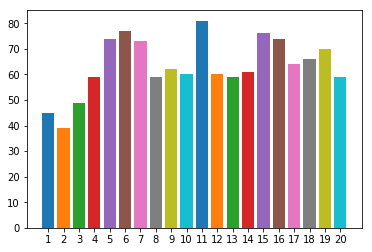

In [66]:
df = df.sort_values(by='Total', ascending=True)
df = df.reset_index(drop=True)

cards_dict = defaultdict(int)
for i, row in df.iterrows():
    cards_dict[row['Team']] = row['Total']

#labels = final_table.Team.values
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    
for i,row in final_table.iterrows():
    plt.bar(i+1, cards_dict[row['Team']])
    
plt.savefig("CardsDistribution.jpeg", bbox_inches='tight')

We clearly saw that the clubs that finished in the bottom( of the main league table) tend to have a higher number of cards (more fouls committed) when compared to the top clubs. The top 3 clubs Man City, Liverpool and Chelsea finished at the bottom in this table of cards earned.

__*Q5*__

__BOGEY TEAMS__

1. Here, we consider the club 'Wolves' also known as Wolverhampton Wanderers, as the bogey team. 
2. We form a league table that consists of just Wolves and the top 6 clubs.
3. We then use the dataframe to plot the league table that shows the league in terms of matches played only between these teams of interest.

In [28]:
df = pd.read_csv('season-1819_csv.csv')

league_table = defaultdict(int)

top6_clubs = ['Wolves','Tottenham','Arsenal','Man City','Man United','Liverpool','Chelsea']

for index, row in df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    if home_team in top6_clubs and away_team in top6_clubs:
        fthg = row['FTHG']
        ftag = row['FTAG']
        ftr = row['FTR']
        if league_table[home_team] and league_table[away_team]:
            points_home = league_table[home_team]
            points_home[5] = points_home[5] + fthg
            points_home[6] = points_home[6] + ftag

            points_away = league_table[away_team]
            points_away[5] = points_away[5] + ftag
            points_away[6] = points_away[6] + fthg

            if ftr == 'H':
                points_home[1] = points_home[1] + 3
                points_home[2] = points_home[2] + 1
                points_away[3] = points_away[3] + 1

            elif ftr == 'A':
                points_away[1] = points_away[1] + 3
                points_away[2] = points_away[2] + 1
                points_home[3] = points_home[3] + 1
            else:
                points_home[1] = points_home[1] + 1
                points_home[4] = points_home[4] + 1
                points_away[1] = points_away[1] + 1
                points_away[4] = points_away[4] + 1

            points_home[0]+=1
            points_away[0]+=1

            league_table[home_team] = points_home
            league_table[away_team] = points_away
        else:
            
            if ftr == 'H':
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[1] = points_home[1] + 3
                    points_home[2] = points_home[2] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                    league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
                    
                elif league_table[away_team]:
                    
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[3] = points_away[3] + 1
                    points_away[0]+=1
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                    league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
                    
            
            elif ftr == 'A':
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[3] = points_home[3] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                    league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]
                    
                elif league_table[away_team]:
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[1] = points_away[1] + 3
                    points_away[2] = points_away[2] + 1
                    points_away[0]+=1
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                    league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]
                    
            else:
                if league_table[home_team]:
                    points_home = league_table[home_team]
                    points_home[5] = points_home[5] + fthg
                    points_home[6] = points_home[6] + ftag
                    points_home[1] = points_home[1] + 1
                    points_home[4] = points_home[4] + 1
                    points_home[0]+=1
                    
                    league_table[home_team] = points_home
                
                    league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
                elif league_table[away_team]:
                    points_away = league_table[away_team]
                    points_away[5] = points_away[5] + ftag
                    points_away[6] = points_away[6] + fthg
                    points_away[1] = points_away[1] + 1
                    points_away[4] = points_away[4] + 1
                    points_away[0]+=1           
                    
                    league_table[away_team] = points_away
                    league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                    
                else:
                    league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                    league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
            
main_list = []
for key, value in league_table.items():
    temp_list = []
    temp_list.append(key)
    for i in value:
        temp_list.append(i)
    main_list.append(temp_list)

df = pd.DataFrame(main_list, columns=['Team','MP','Points','W','L','D','GF','GA'])
df = df[['Team','MP','W','D','L','GF','GA','Points']]
df = df.sort_values(by='Points', ascending=False)
df = df.reset_index(drop=True)
df

,Team,MP,W,D,L,GF,GA,Points
0,Man City,12,9,2,1,24,6,29
1,Liverpool,12,7,4,1,21,8,25
2,Wolves,12,4,4,4,16,18,15
3,Arsenal,12,3,4,5,18,23,13
4,Chelsea,12,3,4,5,14,22,13
5,Tottenham,12,3,1,8,15,20,10
6,Man United,12,1,5,6,10,21,8


Wolves, even though towards the end not a bottom club, was clearly a nuisance to the other top 6 clubs as shown in the table. The rest of the clubs are billion dollar clubs, yet still fail to beat a club that is minute in relative size.

__*Q6*__

__FORM BEFORE THE DERBIES__

1. Here, we check 5 matches before a derby match, how Arsenal fared in those matches, which checks their form leading upto a derby game against Tottenham.
2. I filter the dataframe such that I have results only for Arsenal Football club.
3. I stop iterating when Arsenal is the home team and Tottenham is the away club.
4. When we stop iterating, we see the last 5 results of Arsenal to see if that has any effect on the result of the derby.

In [32]:
df = pd.read_csv('season-1819_csv.csv')

derby = df[(df['HomeTeam'] == 'Arsenal') | (df['AwayTeam'] == 'Arsenal')]

results = []
#Iterating through the dataframe
for i, row in derby.iterrows():
    if row['HomeTeam'] == 'Arsenal' and row['AwayTeam'] == 'Tottenham':
        break
    else:
        #Checking for home wins, away wins for Arsenal
        if row['FTR'] == 'H' and row['HomeTeam'] == 'Arsenal':
            results.append('W')
        elif row['FTR'] == 'A' and row['HomeTeam'] == 'Arsenal':
            results.append('L')
        elif row['FTR'] == 'H' and row['AwayTeam'] == 'Arsenal':
            results.append('L')
        elif row['FTR'] == 'A' and row['AwayTeam'] == 'Arsenal':
            results.append('W')
        else:
            results.append('D')
print("The last 5 results before Arsenal played the North Londond derby, their form was",results[-5:],"and Arsenal went on to win the derby")

The last 5 results before Arsenal played the North Londond derby, their form was ['W', 'D', 'D', 'D', 'W'] and Arsenal went on to win the derby


We do a similar analysis for Manchester United

In [33]:
df = pd.read_csv('season-1819_csv.csv')

derby = df[(df['HomeTeam'] == 'Man United') | (df['AwayTeam'] == 'Man United')]

results = []
for i, row in derby.iterrows():
    if row['HomeTeam'] == 'Man United' and row['AwayTeam'] == 'Man City':
        break
    else:
        if row['FTR'] == 'H' and row['HomeTeam'] == 'Man United':
            results.append('W')
        elif row['FTR'] == 'A' and row['HomeTeam'] == 'Man United':
            results.append('L')
        elif row['FTR'] == 'H' and row['AwayTeam'] == 'Man United':
            results.append('L')
        elif row['FTR'] == 'A' and row['AwayTeam'] == 'Man United':
            results.append('W')
        else:
            results.append('D')
print("The last 5 results before Manchester United played the Manchester derby, their form was",results[-6:],"and Manchester United went on to lose the derby")

The last 5 results before Manchester United played the Manchester derby, their form was ['W', 'L', 'W', 'L', 'W', 'L'] and Manchester United went on to lose the derby


We observe that the form of a team does not necessarily have a big impact on the result of a derby, which has emotions riding high. Just goes to show the human centered analysis that needs to be done in these scenarios and not just depend on quantitative analysis.

__*Q7*__

__Performance of clubs through out the season__

1. I use the same logic to create the league table.
2. I then use the matlplotlib function to plot a line graph, that shows the progress of the clubs throughout the season.
3. Here, I define a list of strings that contain the start and end date in a tuple form. This is then used to iterate over and filter the dataframe to form the graph.
4. I consider only a subset of teams in this analysis which are mentioned in the blocks below

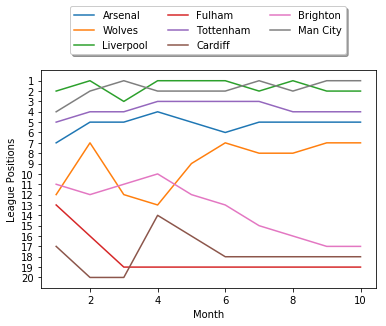

In [42]:
df = pd.read_csv('season-1819_csv.csv')
#league_table = defaultdict(int)



dates = df.Date
new_dates = []
for date in dates:
    new_dates.append(datetime.strptime(date,'%d/%m/%Y'))
    
iter_dates = [('08/08/2018','08/09/2018'), ('08/09/2018','08/10/2018'), ('08/10/2018','08/11/2018'), ('08/11/2018','08/12/2018'), ('08/12/2018','08/01/2019'), 
              ('08/01/2019','08/02/2019'), ('08/02/2019','08/03/2019'), ('08/03/2019','08/04/2019'), ('08/04/2019','08/05/2019'),
              ('08/05/2019','08/06/2019')]
    
df['dates'] = new_dates

df_2 = df.copy()

plot_list_brighton = []
plot_list_fulham = []
plot_list_arsenal = []
plot_list_liverpool = []
plot_list_man_city = []
plot_list_wolves = []
plot_list_cardiff = []
plot_list_tottenham = []

for date in iter_dates:
    
    df = df_2.copy()
    
    df = df[(df['dates'] >= datetime.strptime('08/08/2018', '%d/%m/%Y')) & (df['dates'] <= datetime.strptime(date[1], '%d/%m/%Y'))]




    league_table = defaultdict(int)

    for index, row in df.iterrows():

        #Storing the names of home team, away team, goals scored and the full time result.
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        fthg = row['FTHG']
        ftag = row['FTAG']
        ftr = row['FTR']
        if league_table[home_team]:
            points_home = league_table[home_team]
            points_home[5] = points_home[5] + fthg
            points_home[6] = points_home[6] + ftag

            points_away = league_table[away_team]
            points_away[5] = points_away[5] + ftag
            points_away[6] = points_away[6] + fthg

            if ftr == 'H':
                points_home[1] = points_home[1] + 3
                points_home[2] = points_home[2] + 1
                points_away[3] = points_away[3] + 1

            elif ftr == 'A':
                points_away[1] = points_away[1] + 3
                points_away[2] = points_away[2] + 1
                points_home[3] = points_home[3] + 1
            else:
                points_home[1] = points_home[1] + 1
                points_home[4] = points_home[4] + 1
                points_away[1] = points_away[1] + 1
                points_away[4] = points_away[4] + 1

            #The 0th index refers to number of games played. We add one everytime we come across the same club name
            points_home[0]+=1
            points_away[0]+=1

            #Creating a new value for the same dictionary
            league_table[home_team] = points_home
            league_table[away_team] = points_away
        else:

            if ftr == 'H':
                #We append the following list to the away and home teams if we do not have an entry in the dictionary.
                league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
            elif ftr == 'A':
                league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]

            else:
                league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
    main_list = []
    for key, value in league_table.items():
        temp_list = []
        temp_list.append(key)
        for i in value:
            temp_list.append(i)
        main_list.append(temp_list)

    df_ = pd.DataFrame(main_list, columns=['Team','MP','Points','W','L','D','GF','GA'])
    df_ = df_[['Team','MP','W','D','L','GF','GA','Points']]
    df_ = df_.sort_values(by='Points', ascending=False)
    df_ = df_.reset_index(drop=True)
    
#     print(df_[df_['Team'] == 'Brighton'].index[0]+1)
        
    plot_list_brighton.append(df_[df_['Team'] == 'Brighton'].index[0]+1)
    plot_list_fulham.append(df_[df_['Team'] == 'Fulham'].index[0]+1)
    plot_list_cardiff.append(df_[df_['Team'] == 'Cardiff'].index[0]+1)
    plot_list_wolves.append(df_[df_['Team'] == 'Wolves'].index[0]+1)
    plot_list_arsenal.append(df_[df_['Team'] == 'Arsenal'].index[0]+1)
    plot_list_tottenham.append(df_[df_['Team'] == 'Tottenham'].index[0]+1)
    plot_list_man_city.append(df_[df_['Team'] == 'Man City'].index[0]+1)
    plot_list_liverpool.append(df_[df_['Team'] == 'Liverpool'].index[0]+1)
    
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_arsenal)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_wolves)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_liverpool)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_fulham)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_tottenham)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_cardiff)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_brighton)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_man_city)
plt.legend(['Arsenal','Wolves','Liverpool','Fulham','Tottenham','Cardiff','Brighton','Man City'], loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(21,0)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylabel('League Positions')
plt.xlabel('Month')
plt.savefig('OverallSeason.jpeg', bbox_inches='tight')

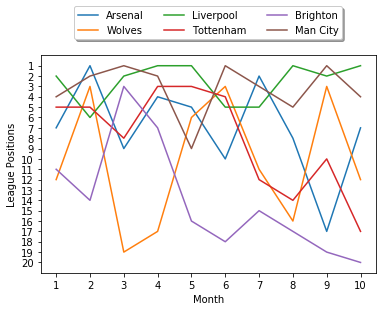

In [41]:
df = pd.read_csv('season-1819_csv.csv')
#league_table = defaultdict(int)



dates = df.Date
new_dates = []
for date in dates:
    new_dates.append(datetime.strptime(date,'%d/%m/%Y'))
    
iter_dates = [('08/08/2018','08/09/2018'), ('08/09/2018','08/10/2018'), ('08/10/2018','08/11/2018'), ('08/11/2018','08/12/2018'), ('08/12/2018','08/01/2019'), 
              ('08/01/2019','08/02/2019'), ('08/02/2019','08/03/2019'), ('08/03/2019','08/04/2019'), ('08/04/2019','08/05/2019'),
              ('08/05/2019','08/06/2019')]
    
df['dates'] = new_dates

df_2 = df.copy()

plot_list_brighton = []
plot_list_fulham = []
plot_list_arsenal = []
plot_list_liverpool = []
plot_list_man_city = []
plot_list_wolves = []
plot_list_cardiff = []
plot_list_tottenham = []

for date in iter_dates:
    
    df = df_2.copy()
    
    df = df[(df['dates'] >= datetime.strptime(date[0], '%d/%m/%Y')) & (df['dates'] <= datetime.strptime(date[1], '%d/%m/%Y'))]

    league_table = defaultdict(int)

    for index, row in df.iterrows():

        #Storing the names of home team, away team, goals scored and the full time result.
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        fthg = row['FTHG']
        ftag = row['FTAG']
        ftr = row['FTR']
        
        if league_table[home_team]:
            points_home = league_table[home_team]
            points_home[5] = points_home[5] + fthg
            points_home[6] = points_home[6] + ftag

            points_away = league_table[away_team]
            points_away[5] = points_away[5] + ftag
            points_away[6] = points_away[6] + fthg

            if ftr == 'H':
                points_home[1] = points_home[1] + 3
                points_home[2] = points_home[2] + 1
                points_away[3] = points_away[3] + 1

            elif ftr == 'A':
                points_away[1] = points_away[1] + 3
                points_away[2] = points_away[2] + 1
                points_home[3] = points_home[3] + 1
            else:
                points_home[1] = points_home[1] + 1
                points_home[4] = points_home[4] + 1
                points_away[1] = points_away[1] + 1
                points_away[4] = points_away[4] + 1

            #The 0th index refers to number of games played. We add one everytime we come across the same club name
            points_home[0]+=1
            points_away[0]+=1

            #Creating a new value for the same dictionary
            league_table[home_team] = points_home
            league_table[away_team] = points_away
        else:

            if ftr == 'H':
                #We append the following list to the away and home teams if we do not have an entry in the dictionary.
                league_table[home_team] = [1, 3, 1, 0, 0, fthg, ftag]
                league_table[away_team] = [1, 0, 0, 1, 0, ftag, fthg]
            elif ftr == 'A':
                league_table[home_team] = [1, 0, 0, 1, 0, fthg, ftag]
                league_table[away_team] = [1, 3, 1, 0, 0, ftag, fthg]

            else:
                league_table[home_team] = [1, 0, 0, 0, 1, fthg, ftag]
                league_table[away_team] = [1, 0, 0, 0, 1, ftag, fthg]
    main_list = []
    for key, value in league_table.items():
        temp_list = []
        temp_list.append(key)
        for i in value:
            temp_list.append(i)
        main_list.append(temp_list)

    df_ = pd.DataFrame(main_list, columns=['Team','MP','Points','W','L','D','GF','GA'])
    df_ = df_[['Team','MP','W','D','L','GF','GA','Points']]
    df_ = df_.sort_values(by='Points', ascending=False)
    df_ = df_.reset_index(drop=True)
    
#     print(df_[df_['Team'] == 'Brighton'].index[0]+1)
        
    plot_list_brighton.append(df_[df_['Team'] == 'Brighton'].index[0]+1)
    plot_list_fulham.append(df_[df_['Team'] == 'Fulham'].index[0]+1)
    plot_list_cardiff.append(df_[df_['Team'] == 'Cardiff'].index[0]+1)
    plot_list_wolves.append(df_[df_['Team'] == 'Wolves'].index[0]+1)
    plot_list_arsenal.append(df_[df_['Team'] == 'Arsenal'].index[0]+1)
    plot_list_tottenham.append(df_[df_['Team'] == 'Tottenham'].index[0]+1)
    plot_list_man_city.append(df_[df_['Team'] == 'Man City'].index[0]+1)
    plot_list_liverpool.append(df_[df_['Team'] == 'Liverpool'].index[0]+1)

plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_arsenal)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_wolves)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_liverpool)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_tottenham)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_brighton)
plt.plot([1,2,3,4,5,6,7,8,9,10], plot_list_man_city)
plt.legend(['Arsenal','Wolves','Liverpool','Tottenham','Brighton','Man City'], loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(21,0)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) 
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('League Positions')
plt.xlabel('Month')

plt.savefig('MonthlySeason.jpeg', bbox_inches='tight')

As shown in the graphs above, there's no specific trend that we see except for the top 2 clubs, Liverpool and Man City. These 2 start well and end well, whereas clubs like Brighton, Wolves show a very erratic trend in their league positions.
The first graph shows a snapshot of the league table after every month taken in a continuous form, where as the second figure shows the league calculated per month separately.